<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция 4. Кейс-стади. Статистические показатели.

Анализ датасета с kaggle по классификации стекла
https://www.kaggle.com/uciml/glass

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

Считываем данные

In [2]:
data=pd.read_csv('glass.csv')
print(data.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


Переменные:
RI
содержание хим. элементов в составе
Type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Nan значений в датасете нет

In [25]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [62]:
data['Type'].mode()

0    2
dtype: int64

Для посиска регрессии данные нужно будет нормализовать, т.к. большой разброс значений между переменными (например Si и Ba)

Начертим график плотности распределения величин. 

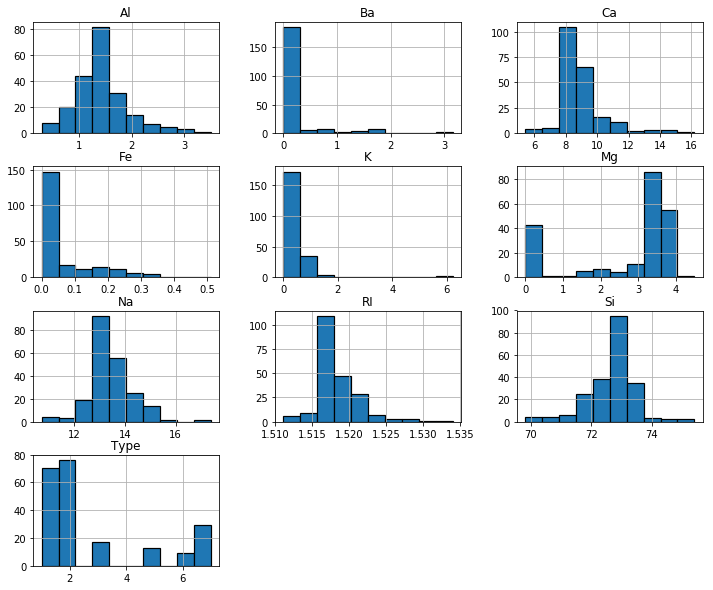

In [4]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

Виды распределений

*   Условно нормальное (Al, Na, Si, Ca, RI)
*   Логнормальное (K, Fe)
* Ba логнормальное, но есть выбросы

Type - дискретная величина, 7 типов стекла, отличающихся по хим составу
Посмотрим средние величины хим элементов по каждому типу


In [31]:
data.groupby(['Type']).mean()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


0. Нет типа № 4
1. Все типы относятся к виду силикатных стекол
2. По среднему хим составу наиболее отличается №6

In [39]:
# по типам данные распределены не равномерно, наибольшее кол-во приходится на type = 1, 2, 7
# при этом 1 и 2 типы близки по хим. составу между собой
data.groupby('Type').count()['Si'].sort_values(ascending = False)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: Si, dtype: int64

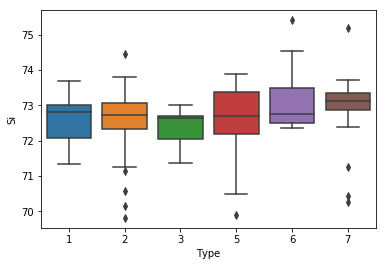

In [44]:
# Si имеет небольшу по сравнению с другими хим элементами вариацию
sns.boxplot('Type', 'Si', data = data)

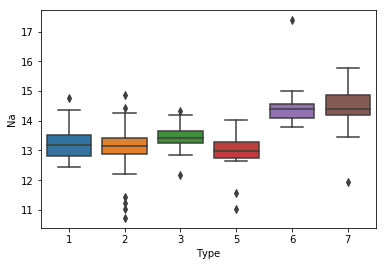

In [41]:
# 2 группы type = 1, 2, 3, 5
# type = 6, 7
sns.boxplot('Type', 'Na', data = data)

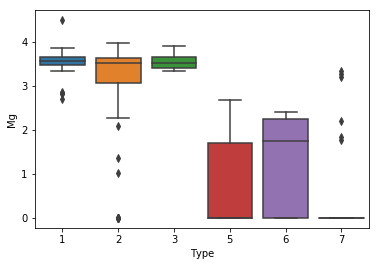

In [42]:
# можно выделить 3 группы по содержанию Mg
# type = 1, 2, 3
# type = 5, 7
# type = 6
sns.boxplot('Type', 'Mg', data = data)

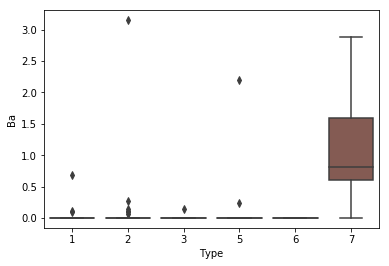

In [47]:
# Ba  имеет только тип 7
sns.boxplot('Type', 'Ba', data = data)

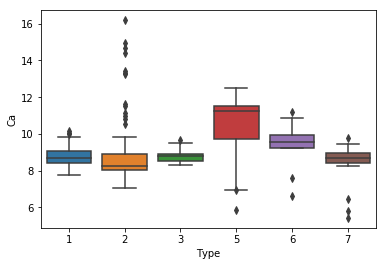

In [46]:
# Ca выделяет type = 1, 2, 3, 7
# type = 5
# type = 6
sns.boxplot('Type', 'Ca', data = data)

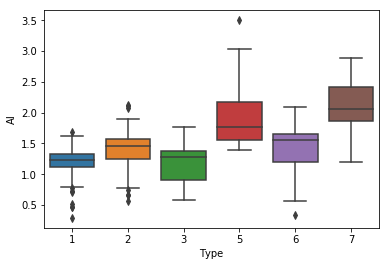

In [43]:
# Al выделяет type = 1, 2, 3, 6
# type = 5
# type = 7
sns.boxplot('Type', 'Al', data = data)

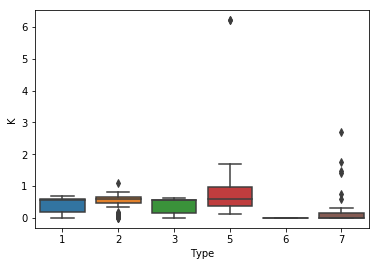

In [45]:
# K выделяет type = 1, 2, 3, 5
# type = 6
# type = 7
sns.boxplot('Type', 'K', data = data)

Типы 1, 2 и 3 схожи по хим. составу
5 близок к первой группе но имеет отличия по Mg, Ca, Al
7 отличается от остальных - Ba
6 - обособленный тип стекла

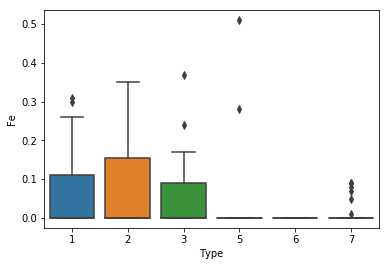

In [48]:
# Fe скорее всего присутствует ввиде примеси, рассмотреть возможность исключить данный параметр
sns.boxplot('Type', 'Fe', data = data)

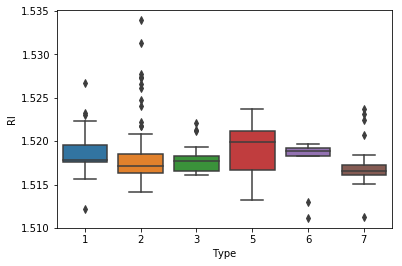

In [40]:
sns.boxplot('Type', 'RI', data = data)

Тип 2 имеет наибольшее кол-во выбросов

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWar

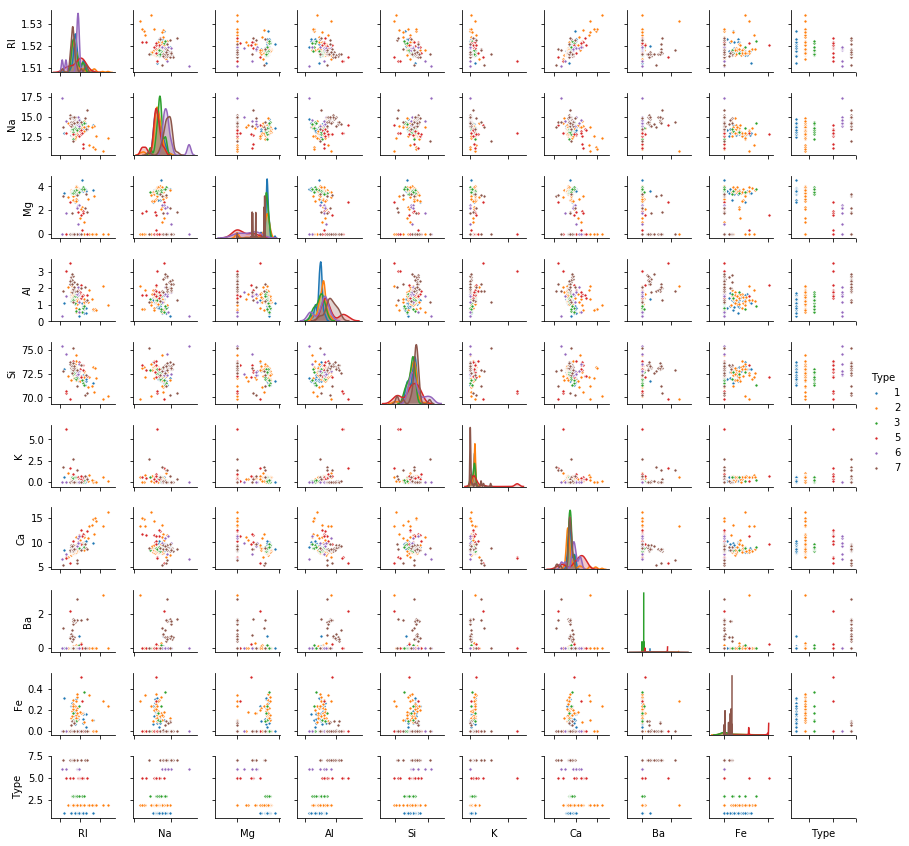

In [49]:
g = sns.pairplot(data=data, hue='Type',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

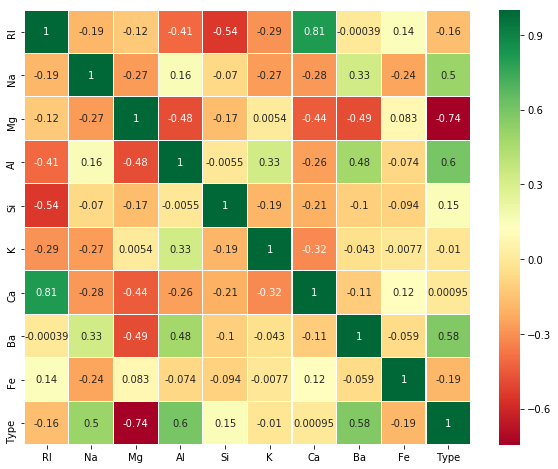

In [28]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

RI зависит от Ca (положительная корреляция) и Si (-)
Na, K, Fe - Не имеет значимой связи с другими хим. элементами и RI
Mg коррелирует с Al (-), Ca (-), Ba (-)
Al с Mg(-), Ba(+)

Для модели по определению типа стекла целесообразно выбрать:
1) поворот по ветору с матрицей коварииции Ca - Al - визуально дают наиболее четкое разделение классов
2) переменную Mg - связана и Ca и Al
3) Наличие Ba больше 0,5 как один из критериев отнесения к типу 7

In [63]:
data.groupby(['Type']).agg(['min', 'max', 'mean'])['Ba']

,min,max,mean
Type,,,
1,0.0,0.69,0.012714
2,0.0,3.15,0.050263
3,0.0,0.15,0.008824
5,0.0,2.20,0.187692
6,0.0,0.00,0.000000
7,0.0,2.88,1.040000
